In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [5]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'] 

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ.VClass = fuel_econ.VClass.astype(vclasses)

In [6]:
fuel_type = []
for trans in fuel_econ.trans:
    fuel_type.append(trans.split()[0])
fuel_econ['trans_type'] = fuel_type   
fuel_econ['trans_type'].value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

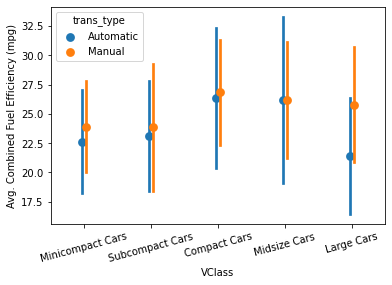

In [9]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type', ci='sd', linestyles="", dodge=True)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

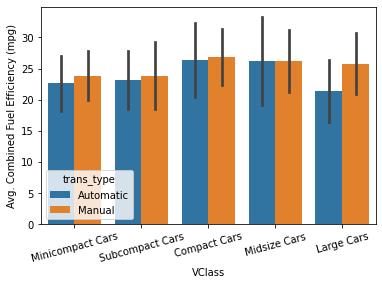

In [10]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type', ci='sd')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

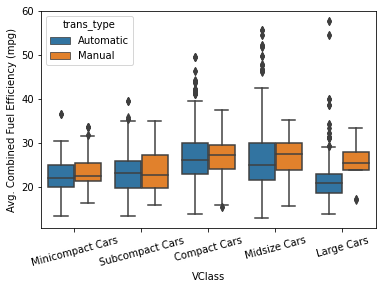

In [11]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

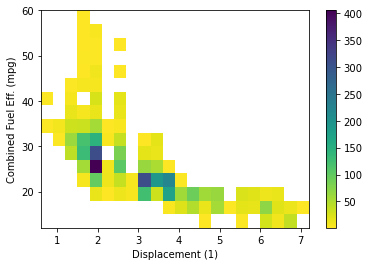

In [12]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y= np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [18]:
#count number of points in each bin

In [14]:
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right = False, include_lowest = False, labels = False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right = False, include_lowest = False, labels = False).astype(int)

n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values

co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

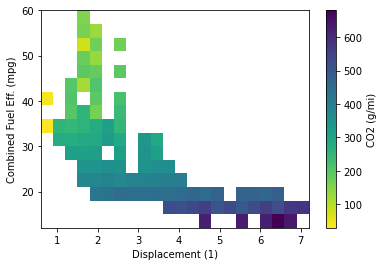

In [17]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y= np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y], weights = co2_weights)
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');